# dependencies

In [1]:
!pip install folium

# import

In [2]:
import pandas as pd 
import numpy as np 

import folium

In [3]:
crash = pd.read_csv('crash.csv')

In [4]:
# 'Troop','County','Incident#','Unnamed: 0','Investigated By' dropped because they were not helpful
crash.drop(columns= ['Troop','County','Incident#','Unnamed: 0','Investigated By'],inplace=True)

In [5]:
crash.rename(columns={'GPS Latitude':'latitude','GPS Longitude':'longitude'},inplace = True)

In [7]:
# drop rows with index 1 and 3
# crash = crash.drop(index=[69, 144, 98, 43, 101, 116, 117, 118, 119])
crash = crash.drop(index=[119,118,43])

# folium

In [8]:
maps = folium.Map(location=[crash['latitude'].mean(), crash['longitude'].mean()], zoom_start=10)


In [9]:
for index, row in crash.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(maps)


In [10]:
maps.save('map.html')

# folium

In [11]:
from IPython.display import IFrame

IFrame(src='map.html', width=700, height=600)


In [12]:
from math import radians, sin, cos, sqrt, atan2

def distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the Earth in kilometers

    # convert decimal degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    d = R * c

    return d

In [13]:
# center point coordinates
center_lat = 37.7749
center_lon = -122.4194

# list of other points with coordinates
points = [
    {'lat': 37.7763, 'lon': -122.4245},
    {'lat': 37.7751, 'lon': -122.4181},
    {'lat': 37.7702, 'lon': -122.4124},
    {'lat': 37.7815, 'lon': -122.4058},
]

# radius in miles
radius = 1

# check if each point is within the radius
for point in points:
    d = distance(center_lat, center_lon, point['lat'], point['lon'])
    if d <= radius:
        print(f"Point ({point['lat']}, {point['lon']}) is within {radius} miles of the center point")
    else:
        print(f"Point ({point['lat']}, {point['lon']}) is outside {radius} miles of the center point")


Point (37.7763, -122.4245) is within 1 miles of the center point
Point (37.7751, -122.4181) is within 1 miles of the center point
Point (37.7702, -122.4124) is within 1 miles of the center point
Point (37.7815, -122.4058) is outside 1 miles of the center point


# Date Time

In [14]:
crash

,latitude,longitude,Date,Time,Location
0,37.078278,-93.877861,04/27/2023,5:15PM,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF..."
1,37.078278,-93.877861,04/27/2023,5:15PM,"I-44 WESTBOUND AT THE 42.2 MM, 3 MILES WEST OF..."
2,37.086639,-93.847805,04/26/2023,4:45PM,HWY H 1/2 MILE SOUTH OF MOUNT VERNON
3,37.023417,-93.969500,04/22/2023,2:50AM,COUNTY ROAD 1050 THREE MILES NORTH OF PIERCE CITY
4,36.942694,-93.927277,04/19/2023,2:40PM,"MO37 ONE MILE NORTH OF PIERCE CITY, MO"
...,...,...,...,...,...
147,37.074917,-93.965138,05/19/2022,8:27AM,I44 7 MILES WEST OF MOUNT VERNON
148,37.075611,-93.975027,05/17/2022,2:34AM,"EASTBOUND I44, 1 MILE WEST OF STOTTS CITY"
149,37.075611,-93.975027,05/17/2022,2:34AM,"EASTBOUND I44, 1 MILE WEST OF STOTTS CITY"
150,37.024778,-93.641502,05/11/2022,1:02AM,LAWRENCE 2170 1 MILE NORTH OF MARIONVILLE


In [15]:
def combine_date_time(df):
    # Convert 'Date' and 'Time' columns to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    df['Time'] = pd.to_datetime(df['Time'], format='%I:%M%p').dt.time

    # Combine 'Date' and 'Time' columns into new 'datetimes' column
    df['datetimes'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

    return df


In [16]:
crash = combine_date_time(crash)

In [18]:
crash.sort_values('Time', ascending= False)

,latitude,longitude,Date,Time,Location,datetimes
81,37.188241,-93.760039,2023-04-10,23:50:00,MO 96 8.5 MILES NORTHEAST OF MOUNT VERNON,2023-04-10 23:50:00
33,37.131805,-93.734666,2022-11-05,23:50:00,I 44 5 MILES EAST OF MT VERNON,2022-11-05 23:50:00
109,37.131805,-93.734666,2022-11-05,23:50:00,I 44 5 MILES EAST OF MT VERNON,2022-11-05 23:50:00
79,37.139500,-93.984472,2023-04-21,23:45:00,COUNTY ROAD 1040 2 MILES NORTH OF STOTTS CITY,2023-04-21 23:45:00
111,37.086333,-93.851225,2022-10-10,23:07:00,I-44 1 MILE WEST OF MOUNT VERNON,2022-10-10 23:07:00
...,...,...,...,...,...,...
38,36.984322,-93.749750,2022-09-26,02:20:00,LAWRENCE 2200 1 MILE WEST OF AURORA,2022-09-26 02:20:00
54,37.218000,-93.785722,2022-07-30,02:00:00,LAWRENCE 2040 THREE MILES EAST OF MILLER,2022-07-30 02:00:00
115,37.089345,-93.810720,2022-09-16,01:40:00,I44 IN MOUNT VERNON,2022-09-16 01:40:00
80,36.957890,-93.996246,2023-04-19,01:25:00,LAWRENCE COUNTY ROAD 1036 .25 MILES EAST OF PI...,2023-04-19 01:25:00


In [29]:
crash.value_counts('Time').head(10)

Time
17:15:00    8
16:45:00    7
02:34:00    5
13:23:00    5
12:10:00    5
13:03:00    3
08:27:00    3
23:07:00    3
22:45:00    3
16:35:00    3
dtype: int64

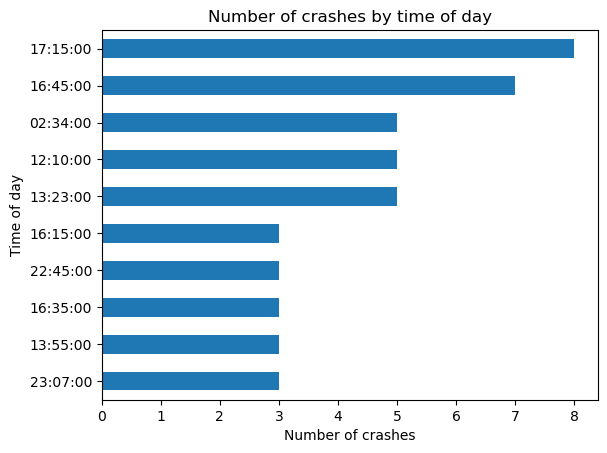

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'crash' is a DataFrame containing the 'Time' column
time_counts = crash['Time'].value_counts().head(10)

# Create horizontal bar plot of value counts
time_counts.plot(kind='barh')

# Invert y-axis to show most common value on top
plt.gca().invert_yaxis()

# Set plot title and axis labels
plt.title('Number of crashes by time of day')
plt.xlabel('Number of crashes')
plt.ylabel('Time of day')

# Display the plot
plt.show()


# checking outliers

In [ ]:
crash['coordinates'] = list(zip(crash['latitude'], crash['longitude']))


In [ ]:
import numpy as np

# Assuming 'df' is the name of your DataFrame with 'Lat' and 'Long' columns
latitudes = np.array(crash['latitude'])
longitudes = np.array(crash['longitude'])

# Calculate the first and third quartiles (Q1 and Q3) of the latitudes and longitudes:
lat_Q1, lat_Q3 = np.percentile(latitudes, [25, 75])
long_Q1, long_Q3 = np.percentile(longitudes, [25, 75])

# Calculate the IQR of the latitudes and longitudes:
lat_IQR = lat_Q3 - lat_Q1
long_IQR = long_Q3 - long_Q1

# Define a threshold for outliers:
lat_threshold = 1.5 * lat_IQR
long_threshold = 1.5 * long_IQR

# Find the indices of the outliers:
lat_outliers_idx = np.where((latitudes < lat_Q1 - lat_threshold) | (latitudes > lat_Q3 + lat_threshold))
long_outliers_idx = np.where((longitudes < long_Q1 - long_threshold) | (longitudes > long_Q3 + long_threshold))

# Print the outlier coordinates and their indices:
print("Latitude Outliers:", latitudes[lat_outliers_idx])
print("Latitude Outliers Indices:", lat_outliers_idx[0])
print("Longitude Outliers:", longitudes[long_outliers_idx])
print("Longitude Outliers Indices:", long_outliers_idx[0])


# these outliers are causing my map to be off

In [ ]:
from scipy import stats

# Calculate the z-score for the GPS Longitude and GPS Latitude columns
z_lon = np.abs(stats.zscore(crash['GPS Longitude']))
z_lat = np.abs(stats.zscore(crash['GPS Latitude']))

# Identify outliers by setting a z-score threshold
z_thresh = 3
outliers_lon = crash[z_lon > z_thresh]
outliers_lat = crash[z_lat > z_thresh]

# Print the outlier values
print('Longitude outliers:')
print(outliers_lon)
print('Latitude outliers:')
print(outliers_lat)


In [ ]:
Longitude outliers:
     GPS Latitude  GPS Longitude        Date    Time  \
69            0.0            0.0  05/23/2022  5:15PM   
144           0.0            0.0  05/23/2022  5:15PM   

                                          Location  
69   COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  
144  COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  
Latitude outliers:
     GPS Latitude  GPS Longitude        Date     Time  \
69            0.0        0.00000  05/23/2022   5:15PM   
98            0.0      -93.84275  12/28/2022  10:45PM   
144           0.0        0.00000  05/23/2022   5:15PM   

                                          Location  
69   COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  
98                   MO 39 2 MILES NORTH OF MILLER  
144  COUNTY ROAD 2185 .5 MILES EAST OF MARIONVILLE  